In [ ]:
# import general libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import pearsonr
import csv
%matplotlib inline
print("install finished")

install finished


In [ ]:
# upload all the file to make sure the reusibility is good
from google.colab import files
uploaded = files.upload()

Saving civ_labor_force.csv to civ_labor_force (1).csv
Saving CPI_for_all_urban_consumers.csv to CPI_for_all_urban_consumers (1).csv
Saving EducationReport.csv to EducationReport (1).csv
Saving EducationReport_college.csv to EducationReport_college (1).csv
Saving employed_civ_amt.csv to employed_civ_amt (1).csv
Saving final_project_datasets.zip to final_project_datasets (1).zip
Saving unemployment_level.csv to unemployment_level (1).csv
Saving unemployment_rate.csv to unemployment_rate.csv




**BRANDON CODE**

In [ ]:
import matplotlib.dates as mdates

In [ ]:
def load_and_prepare_data(file_path, value_column_name, start_year, end_year):
    '''
    Parameters:
    - file_path (str): the file path of the CSV file to load
    - value_column_name (str): the name to assign the value column in the reshaped dataset
    - start_year (str): the starting year for filtering the dataset
    - end_year (int): the ending year filtering the dataset

    Returns:
    - data_final (pd.DataFrame): the final, cleaned and prepared dataset suitable for analysis

    Does: load a dataset from a CSV file, clean and prepare it for analysis
    '''
    data = pd.read_csv(file_path)
    data_cleaned = data.drop(index = range(0, 10)).reset_index(drop = True)
    data_cleaned = data_cleaned.iloc[:, :13]
    data_cleaned.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data_cleaned = data_cleaned[data_cleaned['Year'].apply(lambda x: x.isnumeric())]
    data_cleaned['Year'] = data_cleaned['Year'].astype(int)

    for month in data_cleaned.columns[1:]:
        data_cleaned[month] = pd.to_numeric(data_cleaned[month], errors='coerce')

    data_filtered = data_cleaned[(data_cleaned['Year'] >= start_year) & (data_cleaned['Year'] <= end_year)]
    data_long_format = pd.melt(data_filtered, id_vars = ['Year'], var_name = 'Month', value_name = value_column_name)
    data_long_format['Date'] = pd.to_datetime(data_long_format['Year'].astype(str) + data_long_format['Month'], format = '%Y%b')
    data_final = data_long_format.sort_values(by = 'Date').reset_index(drop = True)

    return data_final


In [ ]:
def perform_linear_regression(data, value_column_name):
    '''
    Parameters:
    - data (pd.DataFrame): the time series dataset containing a 'Date' column and a value column
    - value_column_name (): the name of the column in the dataset that contains the values to be modeled

    Returns:
    - model(LinearRegression): the linear regression model
    - X (pd.DataFrame): the DataFrame containing the independent variable (dates in ordinal format)
    - Y (pd.Dataframe): the Series containing the dependent variable (values from the specified value column).

    Does: perform linear regression on a time series dataset, converts dates to ordinal format to serve
        as the independent variable (X), fits a linear regression model using the specified value column
        as the dependent variable (Y).
    '''
    data['DateOrdinal'] = data['Date'].apply(lambda x: x.toordinal())
    X = data[['DateOrdinal']]
    X_train = X.iloc[:-60]
    Y = data[value_column_name]# Use the dynamic value column name
    Y_train = Y.iloc[:-60]


    model = LinearRegression()
    model.fit(X_train, Y_train)

    return model, X, Y

In [ ]:
def first_order_diff(lst):
    '''
    Parameters:
    - lst(list of float/int): a list of numerical values

    Returns:
    - diff_lst (list of float/int): a list containing the first-order differences of the input list

    Does: calculate the first-order difference of a given list
    '''
    diff_lst = []
    for i in range(1, len(lst)):
        value = lst[i] - lst[i - 1]
        diff_lst.append(value)
    return diff_lst

In [ ]:
def plot_data_and_regression_line(data, X, Y, model, title, ylabel):
    '''
    Plot the given data and a linear regression line
    '''
    plt.figure(figsize = (10, 6))
    plt.scatter(data['Date'], Y, color = 'blue', label = ylabel)

    dates_line = pd.date_range(data['Date'].min(), data['Date'].max(), freq = 'M')
    dates_line_ordinal = dates_line.map(pd.Timestamp.toordinal).to_frame(name = 'DateOrdinal')
    predicted_rates = model.predict(dates_line_ordinal)

    plt.plot(dates_line, predicted_rates, color = 'red', label = 'Linear Regression Line')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()

    plt.show()

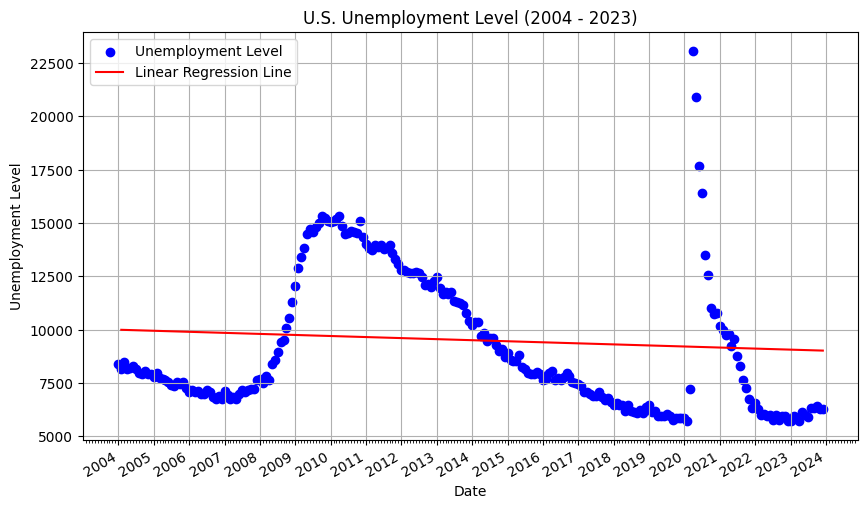

In [ ]:
# Load, prepare, and analyze U.S. unemployment level data from 2004 to 2023 using linear regression, then visualize
# the results with a scatter plot and a fitted regression line.
start_year = 2004
end_year = 2023

unemp_level_path = 'unemployment_level.csv'
unemp_level_data = load_and_prepare_data(unemp_level_path, 'Unemployment Level', start_year, end_year)
unemp_level_model, unemp_level_X, unemp_level_Y = perform_linear_regression(unemp_level_data, 'Unemployment Level')
unemp_level_title = f"U.S. Unemployment Level ({start_year} - {end_year})"
plot_data_and_regression_line(unemp_level_data, unemp_level_X, unemp_level_Y, unemp_level_model, unemp_level_title, 'Unemployment Level')


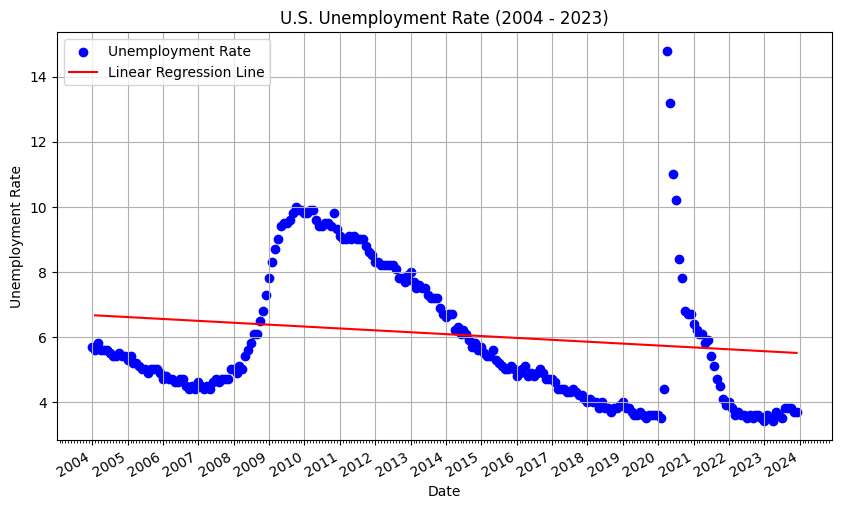

In [ ]:
# Load, prepare, and analyze U.S. unemployment rate data from 2004 to 2023 using linear regression,
# then plot the data and the regression model to visualize trends.
unemp_rate_path = 'unemployment_rate.csv'
unemp_rate_data = load_and_prepare_data(unemp_rate_path, 'Unemployment Rate', start_year, end_year)
unemp_rate_model, unemp_rate_X, unemp_rate_Y = perform_linear_regression(unemp_rate_data, 'Unemployment Rate')
unemp_rate_title = f"U.S. Unemployment Rate ({start_year} - {end_year})"
plot_data_and_regression_line(unemp_rate_data, unemp_rate_X, unemp_rate_Y, unemp_rate_model, unemp_rate_title, 'Unemployment Rate')

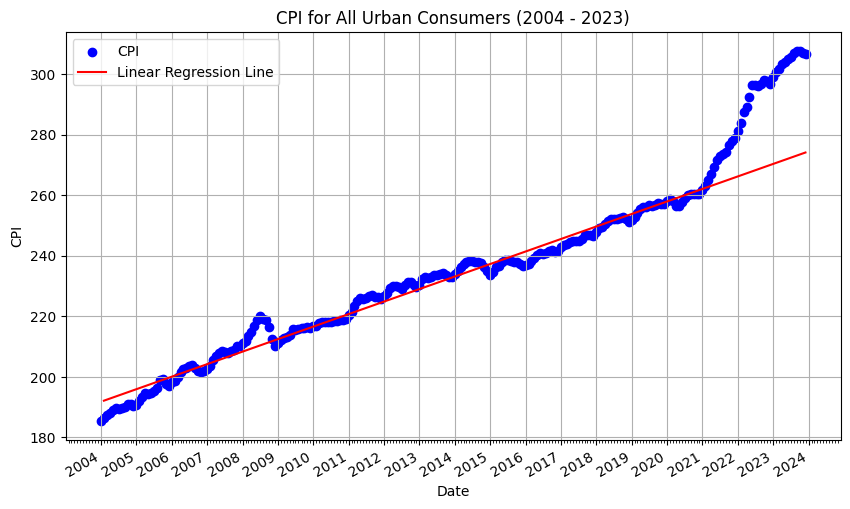

In [ ]:
# Analyze the Consumer Price Index (CPI) for all urban consumers from 2004 to 2023, using linear regression
# to understand trends, and visualize the data with the model's prediction.
cpi_all_path = 'CPI_for_all_urban_consumers.csv'
cpi_all_data = load_and_prepare_data(cpi_all_path, 'CPI', start_year, end_year)
cpi_all_model, cpi_all_X, cpi_all_Y = perform_linear_regression(cpi_all_data, 'CPI')
cpi_all_title = f"CPI for All Urban Consumers ({start_year} - {end_year})"
plot_data_and_regression_line(cpi_all_data, cpi_all_X, cpi_all_Y, cpi_all_model, cpi_all_title, 'CPI')

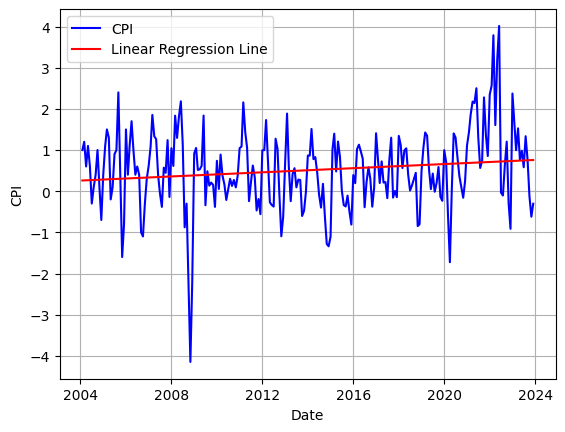

In [ ]:
# Calculate the first-order difference of the CPI to analyze changes over time, fit a linear regression model
# to this differentiated data, and plot both the differentiated CPI and the regression line to visualize trends in CPI changes.
diff_cpi_all_Y = first_order_diff(list(cpi_all_Y))
diff_cpi_all_Y = first_order_diff(list(cpi_all_Y))
cpi_all_data['DateOrdinal'] = cpi_all_data['Date'].apply(lambda x: x.toordinal())
X = cpi_all_data[['DateOrdinal']]
diff_model = LinearRegression()
diff_model.fit(cpi_all_data[['DateOrdinal']].iloc[1: , :], diff_cpi_all_Y)
plt.plot(cpi_all_data['Date'].iloc[1:],diff_cpi_all_Y, color = 'blue', label = "CPI")
dates_line = pd.date_range(cpi_all_data['Date'].min(), cpi_all_data['Date'].max(), freq = 'M')
dates_line_ordinal = dates_line.map(pd.Timestamp.toordinal).to_frame(name = 'DateOrdinal')
predicted_rates = diff_model.predict(dates_line_ordinal)

plt.plot(dates_line, predicted_rates, color = 'red', label = 'Linear Regression Line')
plt.xlabel('Date')
plt.ylabel("CPI")
plt.legend()
plt.grid(True)

**CAMILLE CODE**

In [ ]:
import scipy.spatial.distance as ssd

In [ ]:
#In this cell, we want to clean the Unemployment rate data. We set row 10 as our header.
df_unemployment = pd.read_csv("unemployment_rate.csv")
df_unemployment.columns = df_unemployment.iloc[10]

# Drop the first fifth rows (since the sixth row is now the header)
df_unemployment = df_unemployment.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
header_lst = list(df_unemployment.columns.values)[1:]

df_unemployment[header_lst] = df_unemployment[header_lst].astype(float)
df_unemployment.head()

10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,1974,5.1,5.2,5.1,5.1,5.1,5.4,5.5,5.5,5.9,6.0,6.6,7.2
12,1975,8.1,8.1,8.6,8.8,9.0,8.8,8.6,8.4,8.4,8.4,8.3,8.2
13,1976,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,7.7,7.8,7.8
14,1977,7.5,7.6,7.4,7.2,7.0,7.2,6.9,7.0,6.8,6.8,6.8,6.4
15,1978,6.4,6.3,6.3,6.1,6.0,5.9,6.2,5.9,6.0,5.8,5.9,6.0


In [ ]:
#Convert the data into a 2D list of dictionary

# Convert the DataFrame into a list of dictionaries
unemployment_data = []
for index, row in df_unemployment.iterrows():
    rates = [float(rate) for rate in row[1:]]
    unemployment_data.append({month: rate for month, rate in zip(range(1, 13), rates)})

In [ ]:
#read college education rate

df_college = pd.read_csv("EducationReport_college.csv", header = 2)
df_college.replace('', np.nan, inplace=True)

# Assign the forth row as the header
df_college.columns = df_college.iloc[0]

df_college = df_college.iloc[:, :7]
df_college.head()

,Name,1970,1980,1990,2000,2008-2012,2017-2021
0,Name,1970,1980,1990,2000,2008-2012,2017-2021
1,United States,10.7%,16.2%,20.3%,24.4%,28.5%,33.7%
2,Alabama,7.8%,12.2%,15.7%,19.0%,22.3%,26.7%
3,Alaska,14.1%,21.1%,23.0%,24.7%,27.5%,30.6%
4,Arizona,12.6%,17.4%,20.3%,23.5%,26.6%,31.2%


In [ ]:
#the high school education rate data do not have national data
df_highschool = pd.read_csv("EducationReport.csv")
# Fill blank cells with NaN values
df_highschool.replace('', np.nan, inplace=True)

# Assign the third row as the header
df_highschool.columns = df_highschool.iloc[2]

df_highschool_new = df_highschool.iloc[:, :7]
df_highschool_new.head()

2,Name,1970,1980,1990,2000,2008-2012,2017-2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Total,NaN,NaN,NaN,NaN,NaN
2,Name,1970,1980,1990,2000,2008-2012,2017-2021
3,District of Columbia,26.2%,25.5%,21.2%,20.6%,19.1%,15.5%
4,California,32.8%,31.4%,22.3%,20.1%,20.7%,20.4%


In [ ]:
#In this cell, we want to find out which state have the closest data with the national data, which means that
#we want to find out which state can represent the national data.

#define the national avergae rates
national_rates = df_college.iloc[-1, 1:].str.rstrip('%').astype(float) / 100
df_college_states = df_college.iloc[3:-3, 1:]

#Convert percentage string to float
df_college_states = df_college_states.apply(pd.to_numeric, errors = 'coerce') / 100

#Replace NaN values with the national average rate
df_college_states.fillna(national_rates, inplace = True)

#Calculate Manhattan distance between each state and national state
manhattan_distances = df_college_states.apply(lambda x: x.sub(national_rates).abs().sum(), axis=1)

# Find the state with the minimum Manhattan distance
closest_state_index = manhattan_distances.idxmin()
closest_state = df_college.iloc[manhattan_distances.idxmin() + 3, 0]
closest_state_data = df_college_states.iloc[closest_state_index]
manhattan_distance = manhattan_distances[closest_state_index]

In [ ]:
#print pout the closest state data
print("The state that best represents the national high school education average is:", closest_state)

The state that best represents the national high school education average is: California


In [ ]:
# Filter the data for Arizona state
national_highschool_data = df_highschool_new[df_highschool_new.iloc[:, 0] == closest_state]
education_rates = national_highschool_data.iloc[:, 1:].values.flatten().tolist()
headers = df_highschool_new.columns[1:].tolist()

# Create a dictionary with headers as keys and education rates as values
national_highschool_data_dict = dict(zip(headers, education_rates))
print(national_highschool_data_dict)

{'1970': '32.8%', '1980': '31.4%', '1990': '22.3%', '2000': '20.1%', '2008-2012': '20.7%', '2017-2021': '20.4%'}


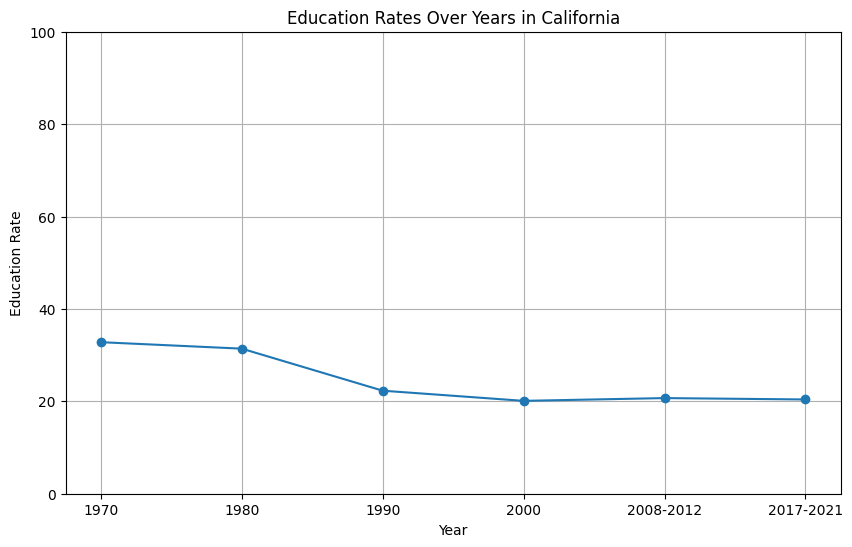

In [ ]:
# Extract years and education rates from the dictionary
years = list(national_highschool_data_dict.keys())

# Remove '%' sign and convert to float
education_rates = [float(rate[:-1]) for rate in education_rates]

# Convert years to integers (assuming they are strings)
years = [str(year) for year in years]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, education_rates, marker='o')
plt.title(f"Education Rates Over Years in {closest_state}")
plt.xlabel('Year')
plt.ylabel('Education Rate')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(years)
plt.show()

In [ ]:
# Filter the data for college national education rate
national_college_data = df_college[df_college.iloc[:, 0] == "United States"]
education_college_rates = national_college_data.iloc[:, 1:].values.flatten().tolist()
headers = df_college.columns[1:].tolist()

# Create a dictionary with headers as keys and education rates as values
national_college_data_dict = dict(zip(headers, education_college_rates))
print(national_college_data_dict)

{'1970': '10.7%', '1980': '16.2%', '1990': '20.3%', '2000': '24.4%', '2008-2012': '28.5%', '2017-2021': '33.7%'}


In [ ]:
#find out the relationship between the high school education rate and unemployment rate

# Load the national unemployment rate data
df_unemployment = df_unemployment

# Extract relevant columns and rows for education rate
highschool_education_rate_data = {
    'Year': ['1980', '1990', '2000', '2008', '2009', '2010', '2011', '2012','2017', '2018', '2019', '2020', '2021'],
    'Highschool_Education_Rate': [31.6, 34.3, 26.1, 24.3, 24.4, 24.4, 24.4, 24.4, 23.5, 23.5, 23.5, 23.5, 23.5]
}

# Convert education rate data into a DataFrame
df_highschool_education = pd.DataFrame(highschool_education_rate_data)



In [ ]:
# Filter relevant years from unemployment data
df_new_unemployment = df_unemployment[df_unemployment['Year'].isin(df_highschool_education['Year'])]
df_filter = df_new_unemployment.drop(columns=['Year'])

lst = df_filter.index.tolist()


# Prepare data for regression
X_highschool = df_highschool_education['Highschool_Education_Rate'].values.reshape(-1, 1)
y_highschool = df_filter.loc[lst].mean(axis = 1)


# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X_highschool, y_highschool)

# Print regression coefficients
print("Intercept:", regression_model.intercept_)
print("High School Education Rate Coefficient:", regression_model.coef_[0])


Intercept: 6.622072744034788
High School Education Rate Coefficient: -0.006825424479336914


In [ ]:
#find out the relationship between the college education rate and unemployment rate
#use college education rate as feature

# Load the national unemployment rate data
df_unemployment = df_unemployment

# Extract relevant columns and rows for education rate
college_education_rate_data = {
    'Year': ['1980', '1990', '2000', '2008', '2009', '2010', '2011', '2012','2017', '2018', '2019', '2020', '2021'],
    'college_Education_Rate': [34.6, 30.0, 30.0, 28.6, 28.2, 28.2, 28.2, 28.2, 28.2, 26.5, 26.5, 26.5, 26.5]
}

# Convert education rate data into a DataFrame
df_college_education = pd.DataFrame(college_education_rate_data)



In [ ]:
# Filter relevant years from unemployment data
df_new_unemployment = df_unemployment[df_unemployment['Year'].isin(df_college_education['Year'])]
df_filter = df_new_unemployment.drop(columns=['Year'])

lst = df_filter.index.tolist()


# Prepare data for regression
X_college = df_college_education['college_Education_Rate'].values.reshape(-1, 1)
y_college = df_filter.loc[lst].mean(axis = 1)


# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X_college, y_college)

# Print regression coefficients
print("Intercept:", regression_model.intercept_)
print("College Education Rate Coefficient:", regression_model.coef_[0])

Intercept: 3.2349197217372923
College Education Rate Coefficient: 0.11283372127880927


In [ ]:
def plot_linear_regression():
    #plot high school linear regression
    plt.scatter(X_highschool, y_highschool, color='blue', label="Actual unemployment rate")

    # Plotting the regression line
    plt.plot(X, regression_model.predict(X_highschool), color='red', label='Regression Line')
    # Adding labels and title
    plt.title('High School Education Rate vs. Unemployment Rate')
    plt.xlabel('High School Education Rate (%)')
    plt.ylabel('Unemployment Rate (%)')
    plt.legend()
    plt.show()

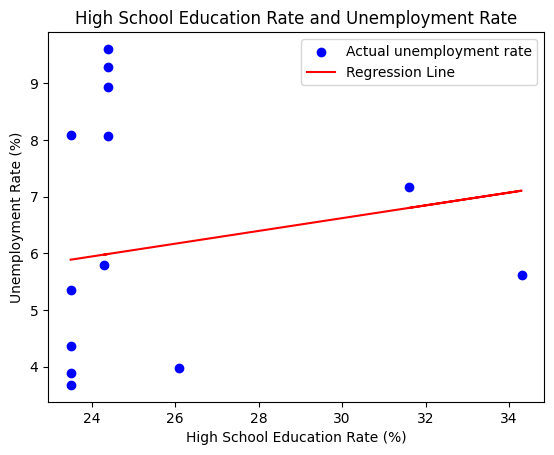

In [ ]:
#plot high school linear regression
plt.scatter(X_highschool, y_highschool, color='blue', label="Actual unemployment rate")

# Plotting the regression line
plt.plot(X_highschool, regression_model.predict(X_highschool), color='red', label='Regression Line')

# Adding labels and title
plt.title('High School Education Rate and Unemployment Rate')
plt.xlabel('High School Education Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()


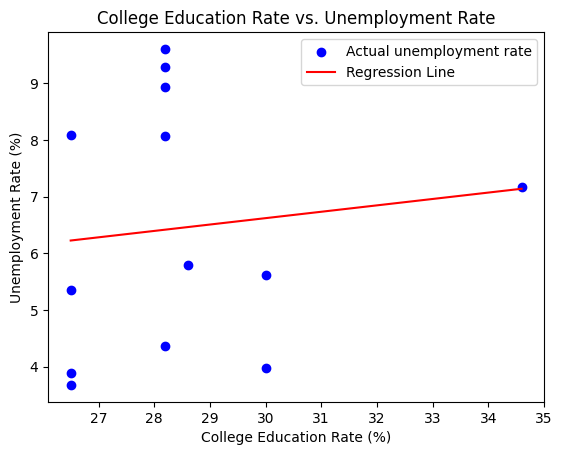

In [ ]:
#plot high school linear regression
plt.scatter(X_college, y_college, color='blue', label="Actual unemployment rate")

# Plotting the regression line
plt.plot(X_college, regression_model.predict(X_college), color='red', label='Regression Line')

# Adding labels and title
plt.title('College Education Rate vs. Unemployment Rate')
plt.xlabel('College Education Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()


**JING CODE**

In [ ]:
import csv
def read_csv(filename):
    ''' given the name of a csv file, return its contents as a 2d list,
        including the header
    '''
    data = []
    with open(filename, "r") as infile:
        csvfile = csv.reader(infile)
        for row in csvfile:
            data.append(row)
    return data

In [ ]:
def plot_by_month(df, title, x_label, y_label):
    ''' given a dataframe, title of the graph, x-axis label, and y-axis label,
        returns a grah plotting each month as a line
    '''
    plt.figure(figsize=(24, 10))
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title = 'Month', loc = 'upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_autocorrection(df, title):
    ''' given a dataframe and a title of the plot, returns an autocorrelation
        plot
    '''
    plt.figure(figsize = (12, 6))
    pd.plotting.autocorrelation_plot(df.stack(), ax=plt.gca())
    plt.title(f'Autocorrelation of {title}')
    plt.xlim()
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Performs first order difference on the data that is transformed into a list
def perform_fod(data):
    ''' given data, converts to a list and returns a new list after performing
        the first order difference
    '''
    lsts = data[12:]
    # removes the year in each list
    for lst in lsts:
        lst.pop(0)
    lst = sum(lsts, [])
    lst = [float(item) for item in lst]
    new_lst = first_order_diff(lst)
    return new_lst

In [ ]:
import math
def clean_data(lst, start):
    ''' given a list and start year, returns a dataframe where
        each column is a year and each row is a month
    '''
    # Organize the row by year where index is the range of the year
    df = pd.DataFrame([lst[i:i+12] for i in range(0, len(lst), 12)],
                      index = range(start, start + (math.ceil(len(lst) / 12))))

    # Rename columns to represent each month
    df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sept', 'Oct', 'Nov', 'Dec']

    # Name index
    df.index.name = 'Year'

    # Replace empty strings with NaN
    df.replace('', float('nan'), inplace = True)

    # Convert numerical columns to float
    for col in df.columns:
        if col != 'Year':
            df[col] = df[col].astype(float)

    df.fillna(0, inplace = True)

    return df

In [ ]:
# Load the Unemployment Rate dataset and take the first order difference
# of each data in the dataset
unemply_rate = read_csv("unemployment_rate.csv")
unemply_rate_fod = perform_fod(unemply_rate)

In [ ]:
# Put the list of data after performing first order difference
# into a dataframe
unemply_rate_df = clean_data(unemply_rate_fod, 1974)
unemply_rate_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1974,0.1,-0.1,0.0,0.0,0.3,0.1,0.0,0.4,0.1,0.6,0.6,0.9
1975,0.0,0.5,0.2,0.2,-0.2,-0.2,-0.2,0.0,0.0,-0.1,-0.1,-0.3
1976,-0.2,-0.1,0.1,-0.3,0.2,0.2,0.0,-0.2,0.1,0.1,0.0,-0.3
1977,0.1,-0.2,-0.2,-0.2,0.2,-0.3,0.1,-0.2,0.0,0.0,-0.4,0.0
1978,-0.1,0.0,-0.2,-0.1,-0.1,0.3,-0.3,0.1,-0.2,0.1,0.1,-0.1


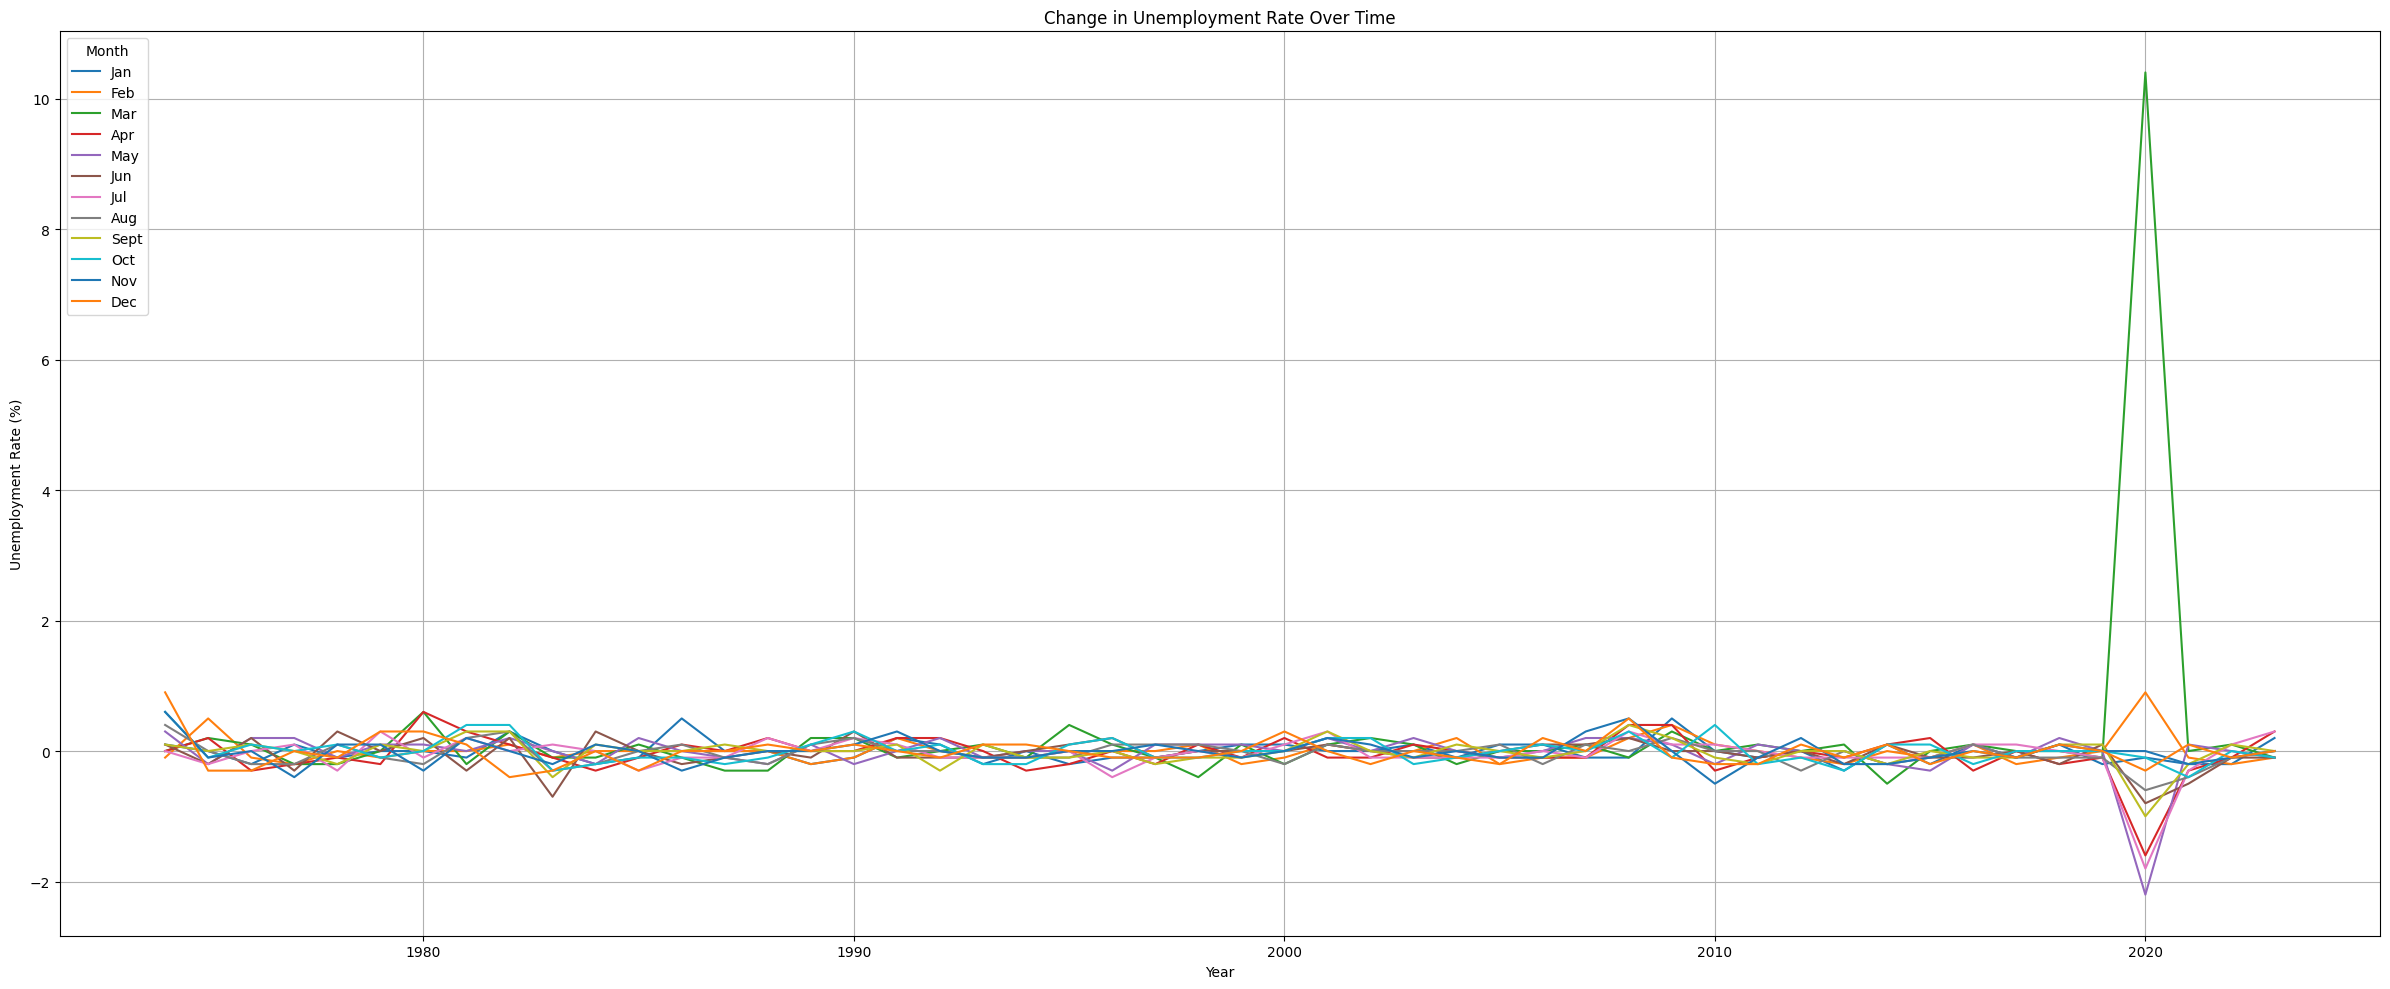

In [ ]:
# Plots the change in unemployment rate from 1974-2023
plot_by_month(unemply_rate_df, "Change in Unemployment Rate Over Time", "Year",
              "Unemployment Rate (%)")

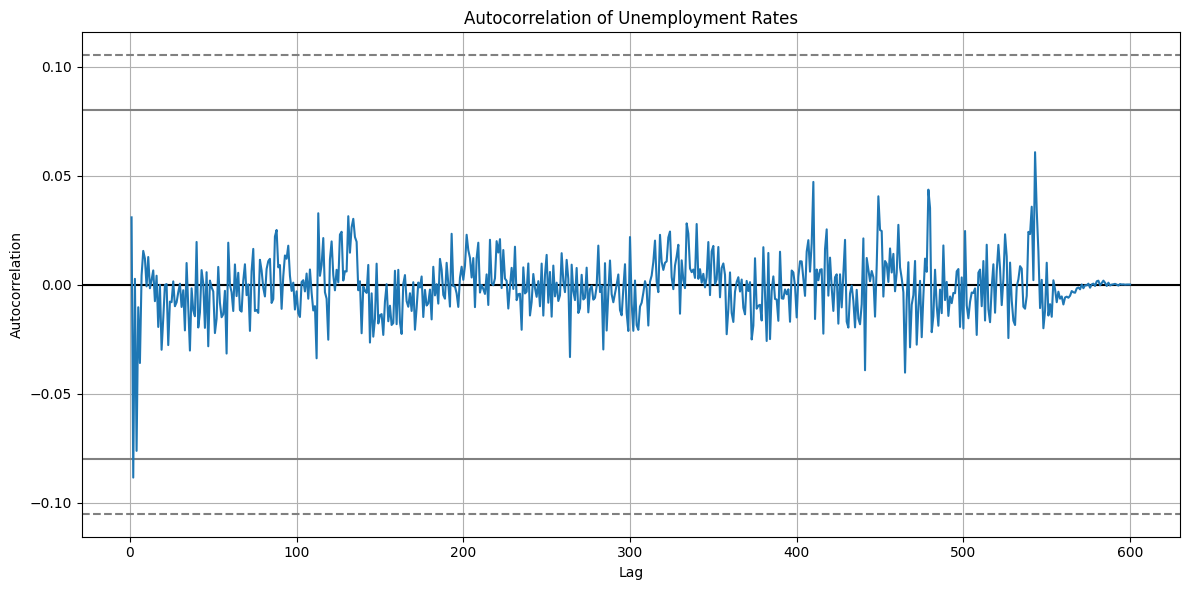

In [ ]:
# Plots the autocorrelation and lag of the change in unemployment rates
# over the 50 years (600 months)
plot_autocorrection(unemply_rate_df, 'Unemployment Rates')

In [ ]:
# Load the Civilian Labor Force Level dataset and take the first order
# difference of each data in the dataset
civ_labor = read_csv("civ_labor_force.csv")
civ_labor_fod = perform_fod(civ_labor)

In [ ]:
# Put the list of data after performing first order difference
# into a dataframe
civ_labor_df = clean_data(civ_labor_fod, 1974)
civ_labor_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1974,286.0,-32.0,-166.0,309.0,272.0,344.0,-153.0,429.0,30.0,248.0,14.0,348.0
1975,-352.0,389.0,234.0,485.0,-309.0,446.0,141.0,40.0,65.0,-17.0,159.0,525.0
1976,64.0,217.0,531.0,101.0,38.0,698.0,158.0,-188.0,151.0,550.0,94.0,-140.0
1977,577.0,330.0,215.0,335.0,428.0,-180.0,453.0,87.0,362.0,761.0,-85.0,382.0
1978,-36.0,255.0,482.0,322.0,475.0,28.0,112.0,284.0,285.0,482.0,247.0,248.0


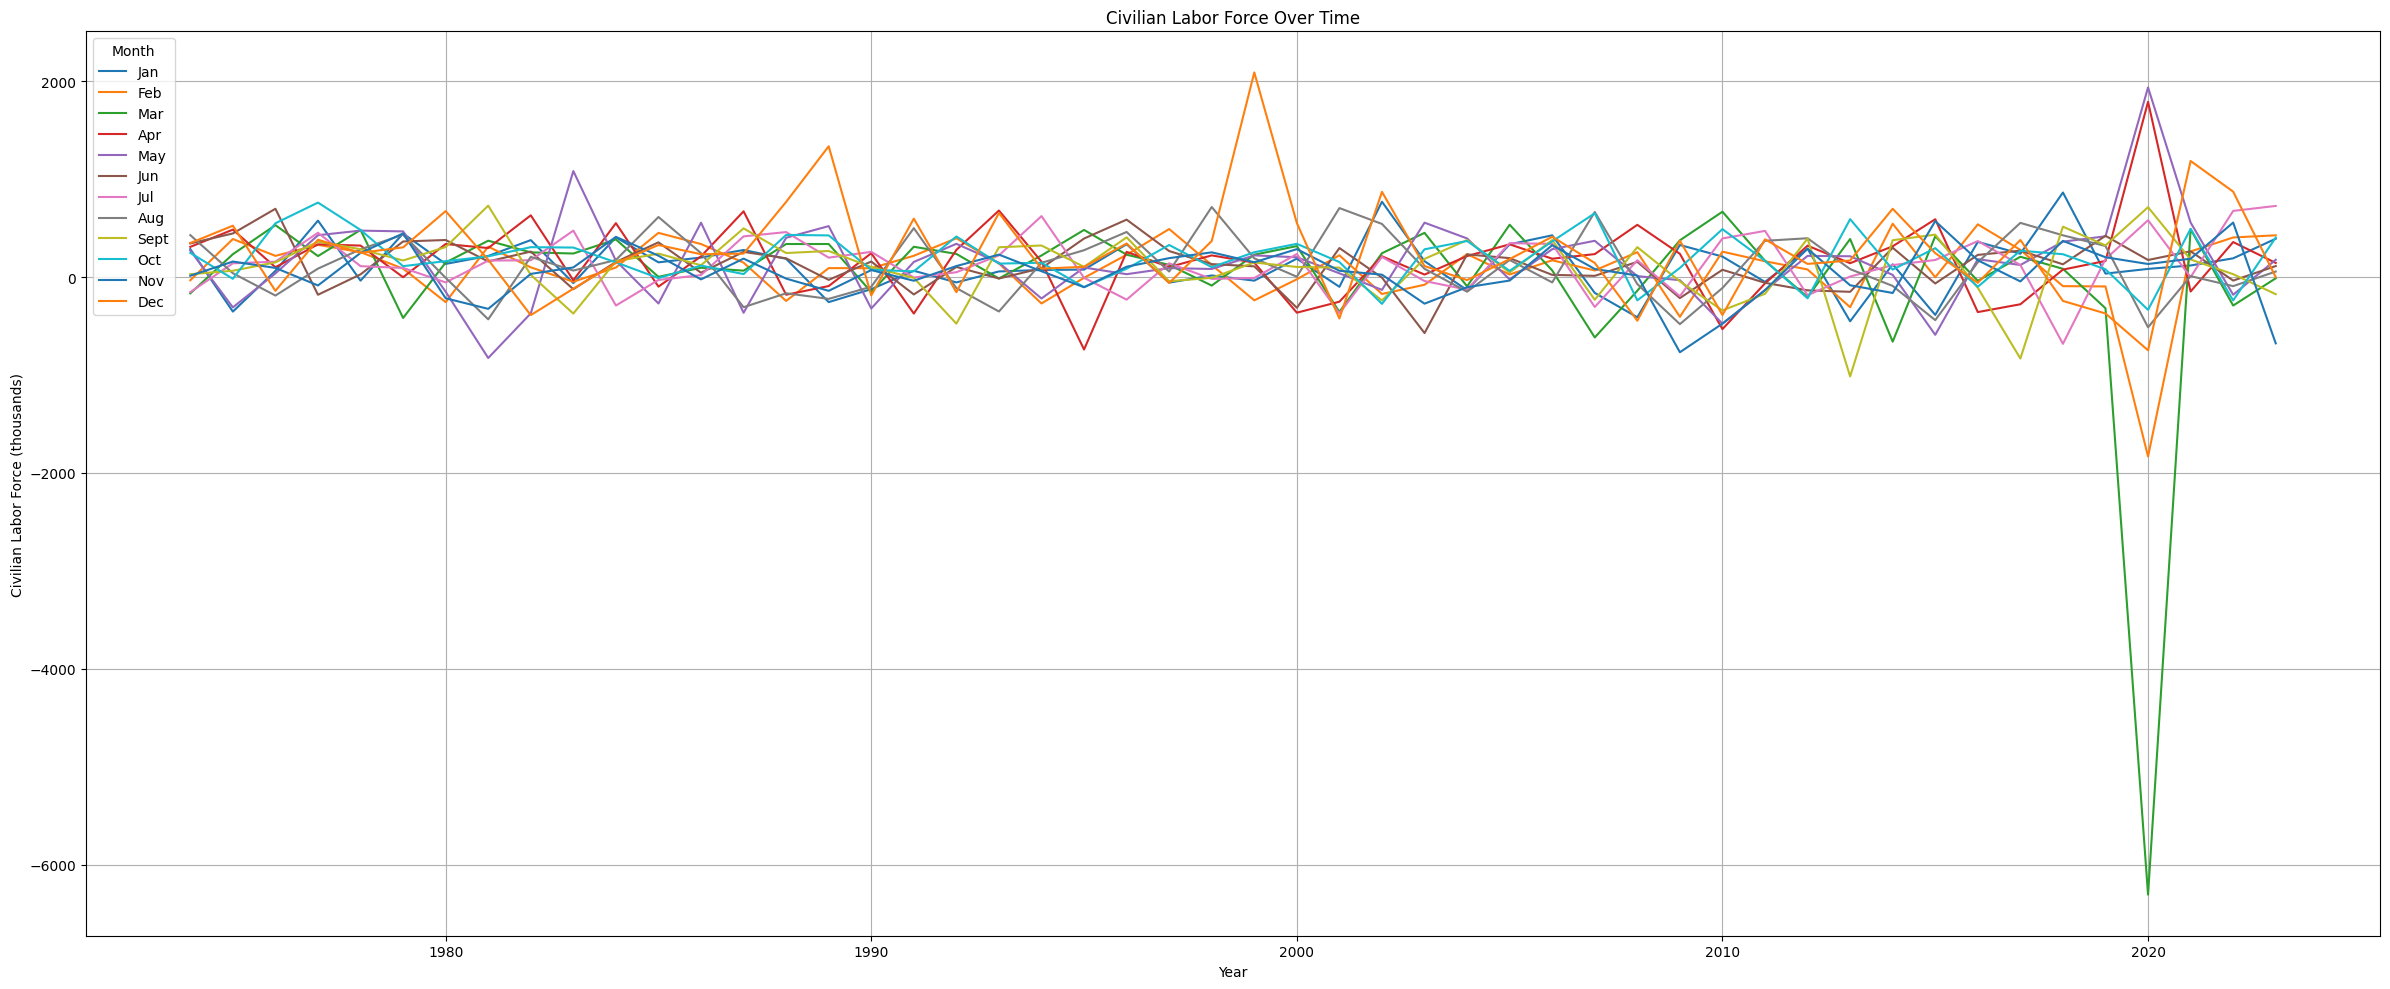

In [ ]:
# Plot the change in the number of civilian labor force from 1974-2023
plot_by_month(civ_labor_df, "Civilian Labor Force Over Time", "Year",
              "Civilian Labor Force (thousands)")

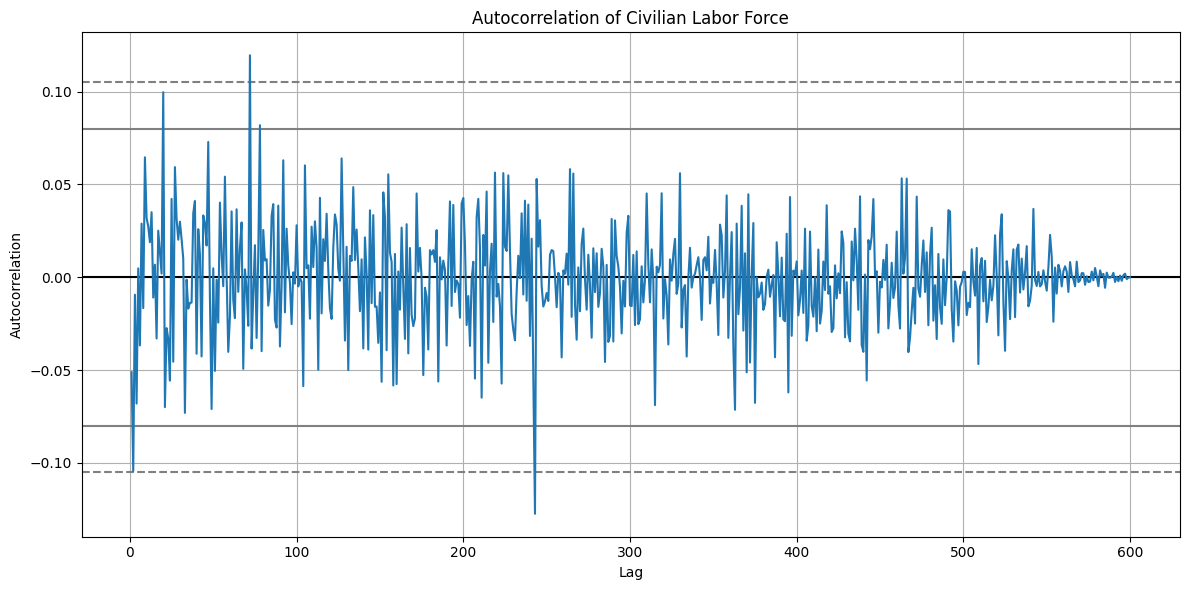

In [ ]:
# Plots the autocorrelation and lag of the change in civilian labor force
# over the 50 years (600 months)
plot_autocorrection(civ_labor_df, 'Civilian Labor Force')

In [ ]:
# Load the Employed Civilian Level dataset and take the first order difference
# of each data in the dataset
employed_civ = read_csv("employed_civ_amt.csv")
employed_civ_fod = perform_fod(employed_civ)

In [ ]:
# Put the list of data after performing first order difference
# into a dataframe
employed_civ_df = clean_data(employed_civ_fod, 1974)
employed_civ_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1974,199.0,65.0,-150.0,222.0,50.0,208.0,-112.0,14.0,-56.0,-369.0,-482.0,-517.0
1975,-371.0,-69.0,2.0,262.0,-96.0,539.0,340.0,45.0,91.0,86.0,209.0,735.0
1976,272.0,313.0,431.0,378.0,-231.0,530.0,130.0,-50.0,101.0,360.0,169.0,125.0
1977,414.0,466.0,463.0,483.0,205.0,125.0,357.0,261.0,350.0,709.0,344.0,279.0
1978,135.0,236.0,639.0,375.0,574.0,-253.0,341.0,239.0,463.0,352.0,96.0,367.0


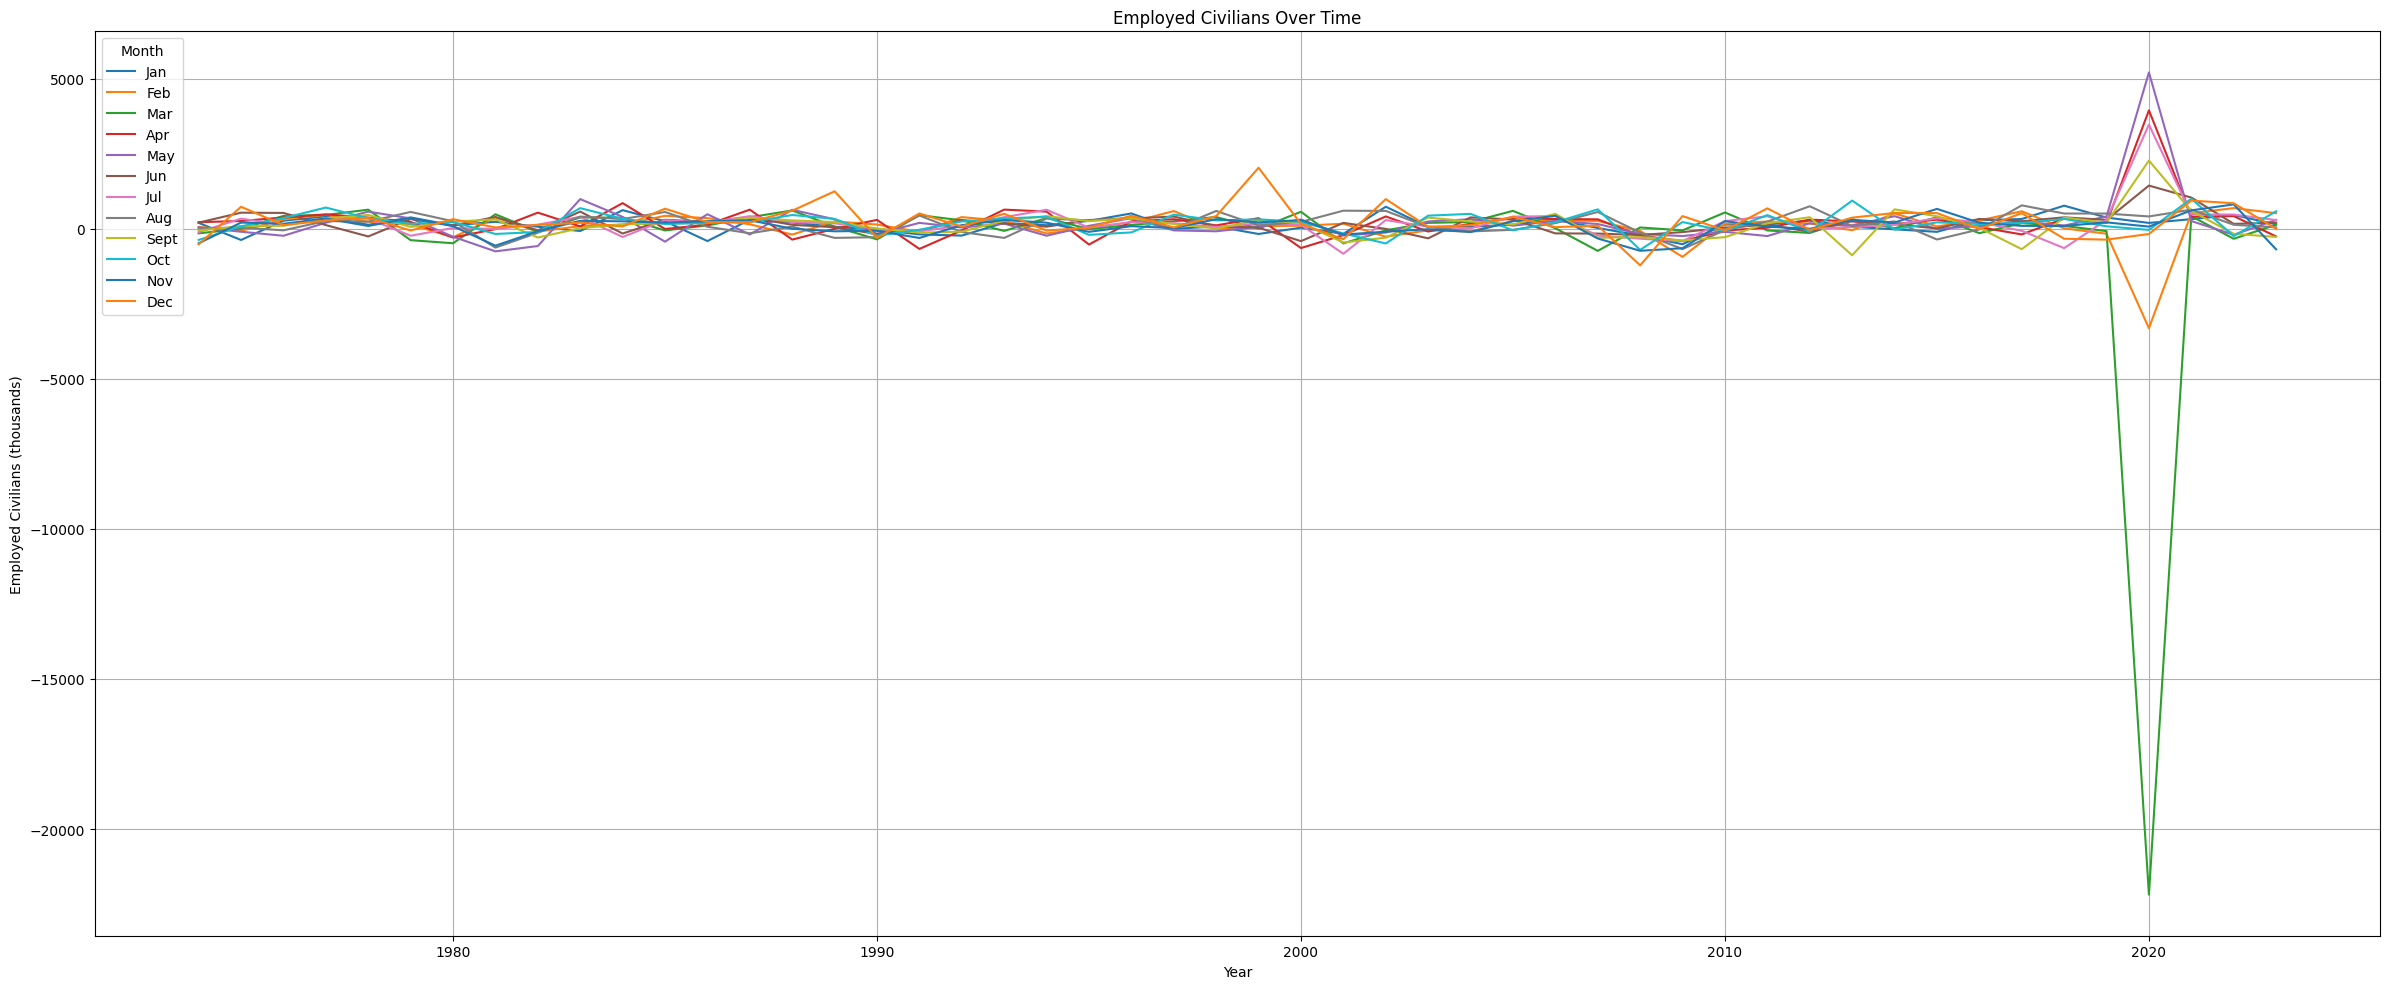

In [ ]:
# Plot the change in number of employed civilian from 1974-2023
plot_by_month(employed_civ_df, "Employed Civilians Over Time", "Year",
              "Employed Civilians (thousands)")

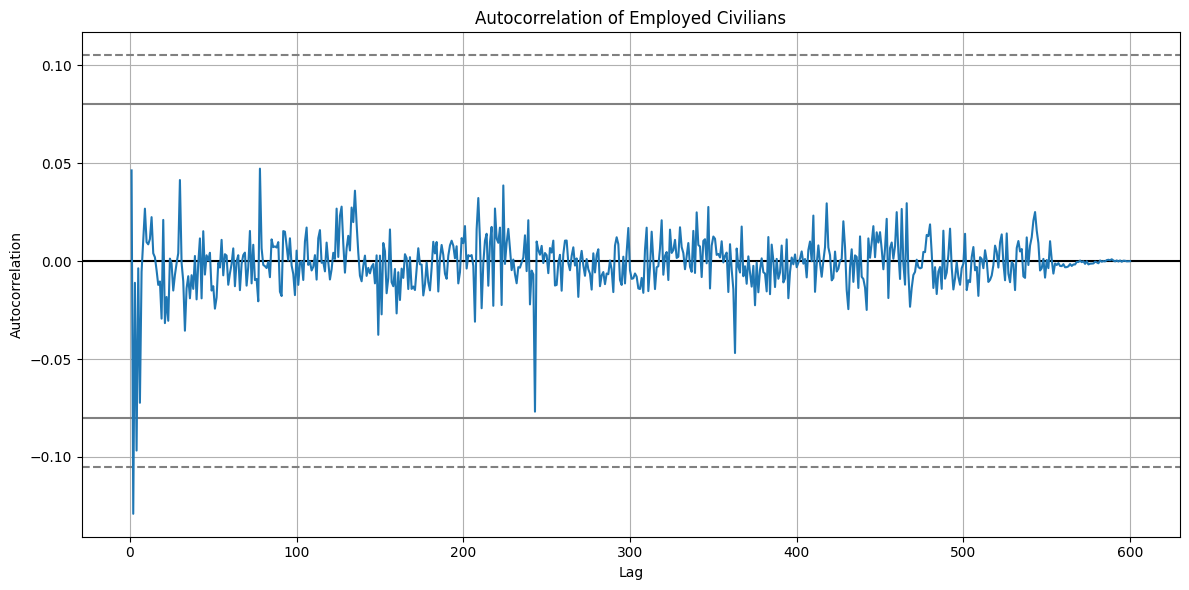

In [ ]:
# Plots the autocorrelation and lag of the change in number of employed
# civilians over the 50 years (600 months)
plot_autocorrection(employed_civ_df, 'Employed Civilians')

In [ ]:
# Load the Umployed Civilian Level dataset and take the first order difference
# of each data in the dataset
unemployed_civ = read_csv("unemployment_level.csv")
unemployed_civ_fod = perform_fod(unemployed_civ)

In [ ]:
# Put the list of data after performing first order difference
# into a dataframe
unemployed_civ_df = clean_data(unemployed_civ_fod, 1974)
unemployed_civ_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1974,87.0,-97.0,-16.0,87.0,222.0,136.0,-41.0,415.0,86.0,617.0,496.0,865.0
1975,19.0,458.0,232.0,223.0,-213.0,-93.0,-199.0,-5.0,-26.0,-103.0,-50.0,-210.0
1976,-208.0,-96.0,100.0,-277.0,269.0,168.0,28.0,-138.0,50.0,190.0,-75.0,-265.0
1977,163.0,-136.0,-248.0,-148.0,223.0,-305.0,96.0,-174.0,12.0,52.0,-429.0,103.0
1978,-171.0,19.0,-157.0,-53.0,-99.0,281.0,-229.0,45.0,-178.0,130.0,151.0,-119.0


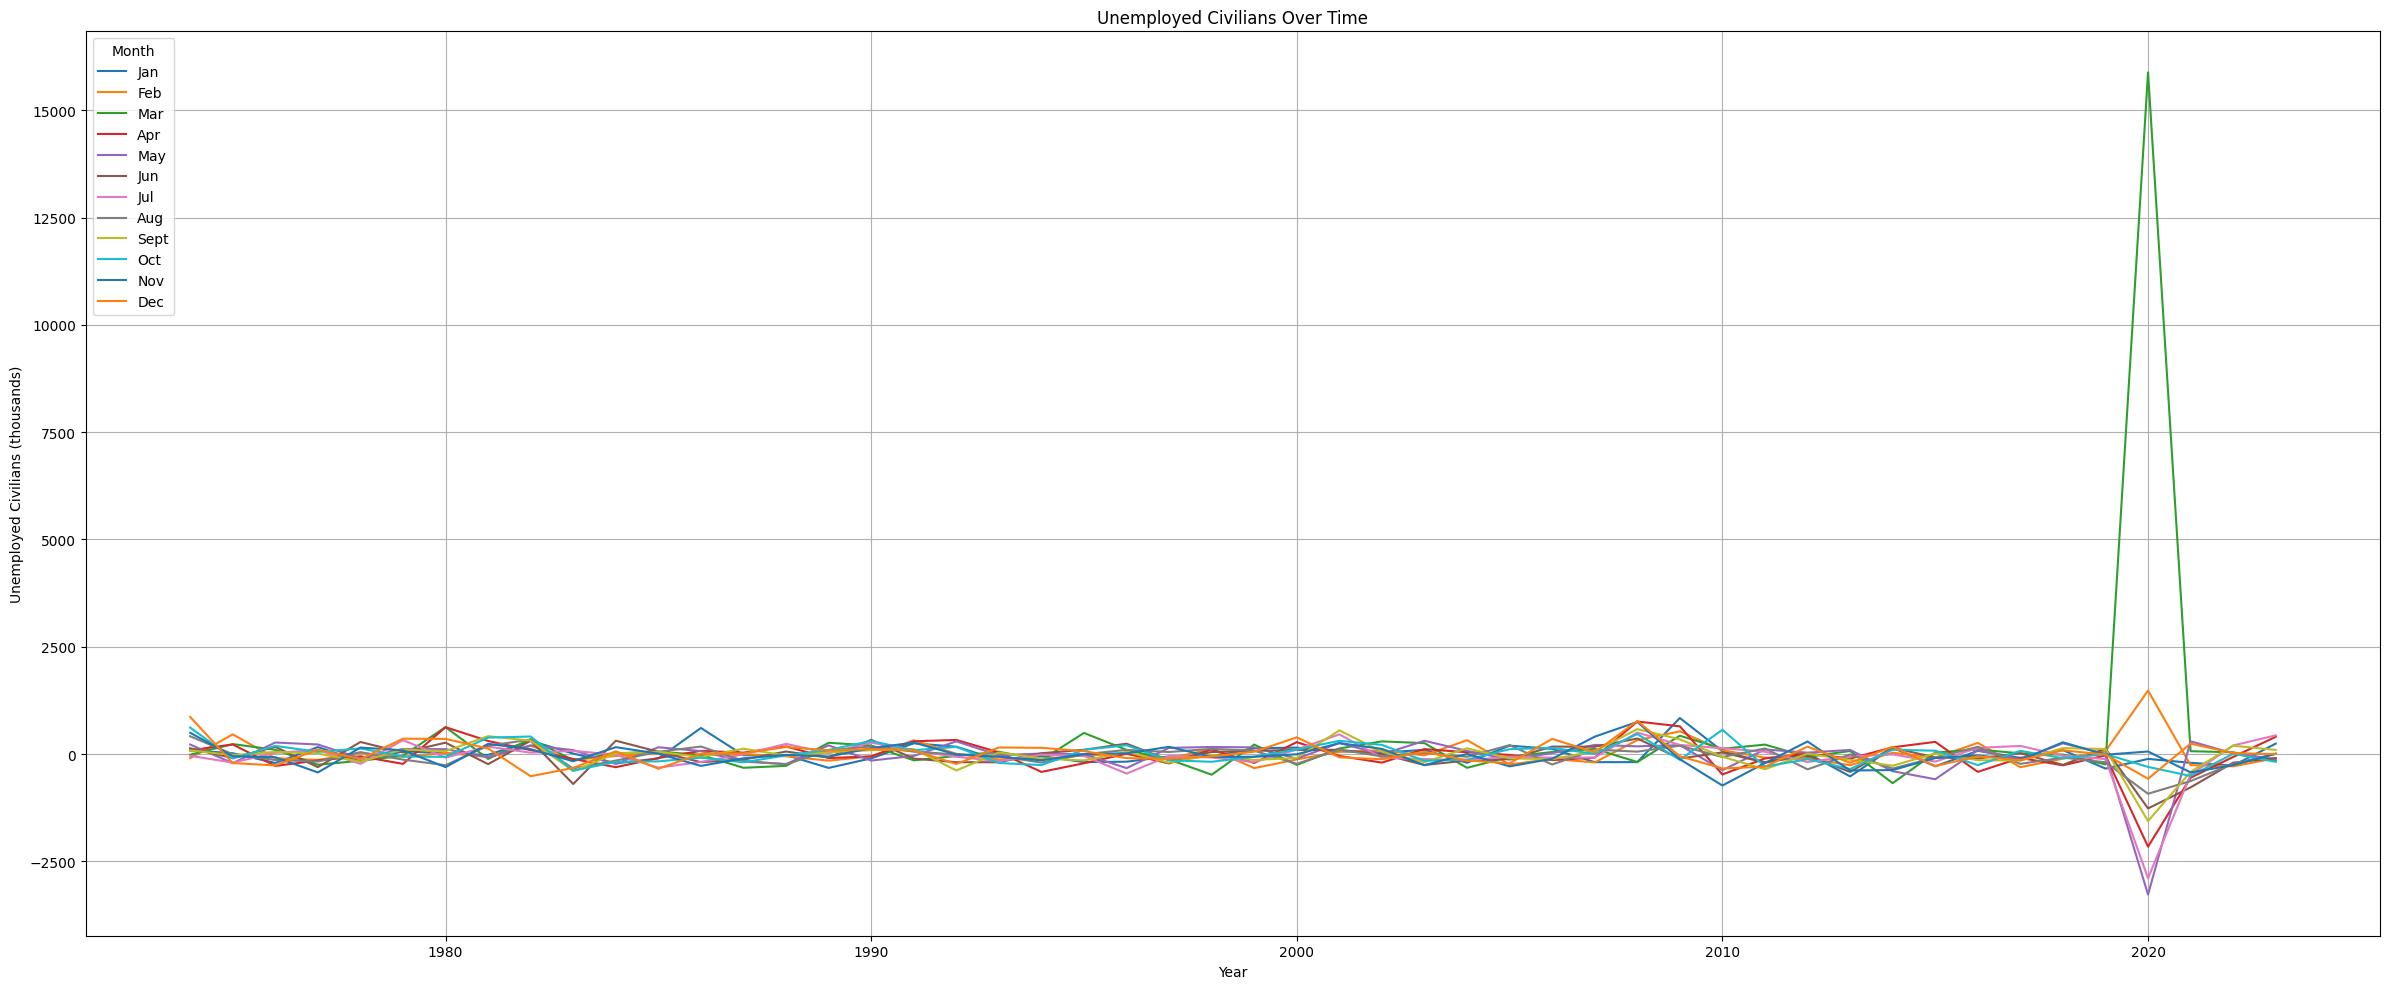

In [ ]:
# Plot the change in number of unemployed civilian from 1974-2023
plot_by_month(unemployed_civ_df, "Unemployed Civilians Over Time", "Year",
              "Unemployed Civilians (thousands)")

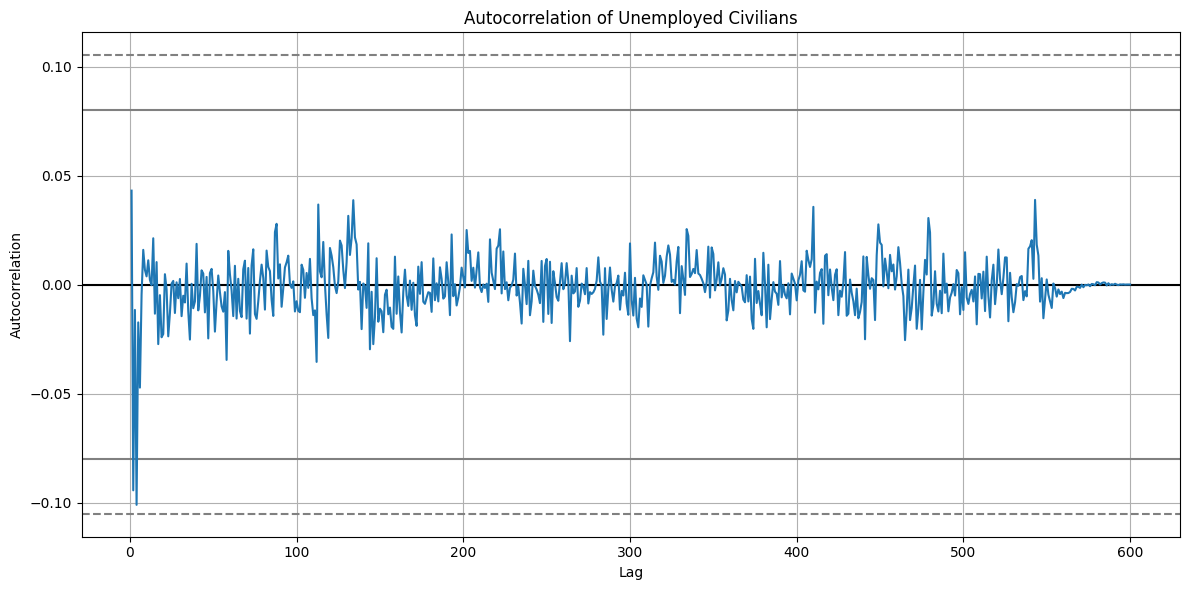

In [ ]:
# Plots the autocorrelation and lag of the change in number of unemployed
# civilians over the 50 years (600 months)
plot_autocorrection(unemployed_civ_df, 'Unemployed Civilians')

**LEON CODE**

In [ ]:
# Choose the year range and the filepath to read in files
start_year, end_year = 1974,2023
filepath_unemp = 'unemployment_level.csv'
value_column_name = 'Unemployment Rate'

Unemp = load_and_prepare_data(filepath_unemp, 'Unemployment Level', start_year, end_year)

In [ ]:
Unemp.head()

,Year,Month,Unemployment Level,Date
0,1974,Jan,4644,1974-01-01
1,1974,Feb,4731,1974-02-01
2,1974,Mar,4634,1974-03-01
3,1974,Apr,4618,1974-04-01
4,1974,May,4705,1974-05-01


In [ ]:
def split_data(data, value_column_name,test_size):
    """ split the data into two parts, the first part for training and the second part for testing
        also you canchoose different testing data size
    """
    data['DateOrdinal'] = data['Date'].apply(lambda x: x.toordinal())
    X = data[['DateOrdinal']]
    X_train = X.iloc[:-test_size]
    y = data[value_column_name]# Use the dynamic value column name
    y_train = y.iloc[:-test_size]

    return X,y,X_train, y_train

In [ ]:
#ACF figure
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf


def adf_test(timeseries):
    """given a timeseries data and test the stationarity of it by using the ADF test
    """
    print ('ADF test result:')
    dftest = ADF(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [ ]:
# Split the data.
X,y,X_Unemp_train, y_Unemp_train = split_data(Unemp, 'Unemployment Level',60)
y_Unemp_train

0      4644
1      4731
2      4634
3      4618
4      4705
       ... 
535    6156
536    6073
537    6211
538    6115
539    6389
Name: Unemployment Level, Length: 540, dtype: int64

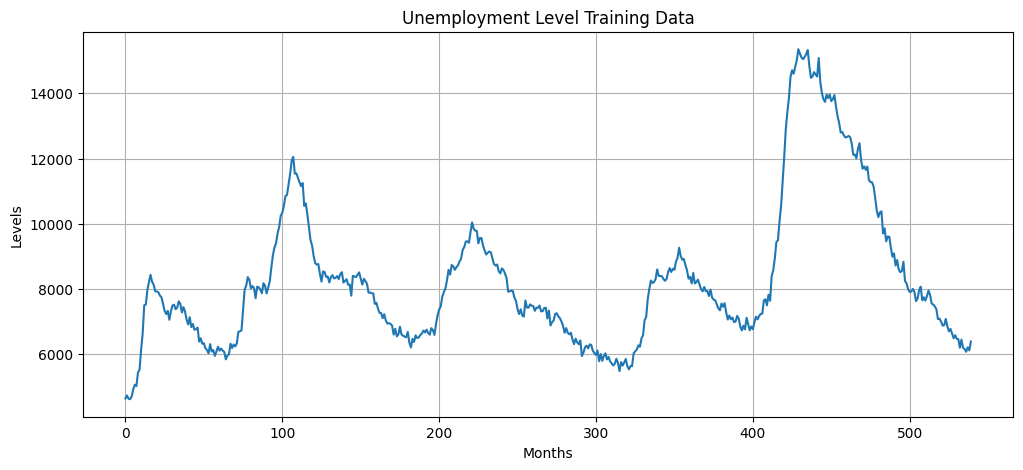

In [ ]:
# Plot the training data
y_Unemp_train.dropna().plot(label = value_column_name,figsize = (12,5))
plt.title('Unemployment Level Training Data')
plt.xlim()
plt.xlabel('Months')
plt.ylabel('Levels')
plt.grid(True)
plt.show()

ADF test result:
Test Statistic                  -3.255830
p-value                          0.016972
Number of Lags Used              6.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


(-0.2, 1.1)

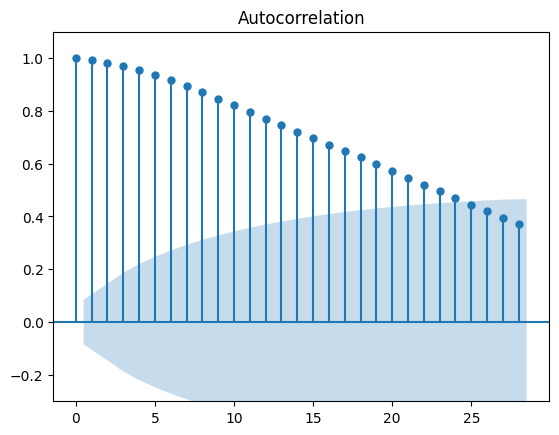

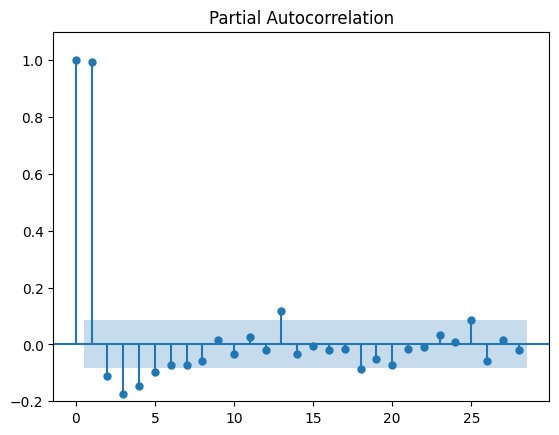

In [ ]:
# Check the ADF, autocorrelation, and partial autocorrelation for the original data
Rate_Unemp = y_Unemp_train
adf_test(Rate_Unemp)

plot_acf(Rate_Unemp)
plt.ylim(-0.3,1.1)
plot_pacf(Rate_Unemp) #pacf
plt.ylim(-0.2,1.1)

In [ ]:
def First_Order_Differencing(timeseries,value_column_name,title):
    #First-Order Differencing
    Diff_data = timeseries.diff().dropna()
    Diff_data.plot(label = value_column_name,figsize = (12,5))
    plt.title(title)
    plt.xlabel('Months')
    plt.ylabel('Levels(Differentiated)')
    plt.grid(True)
    plt.legend()
    plt.show()
    return Diff_data


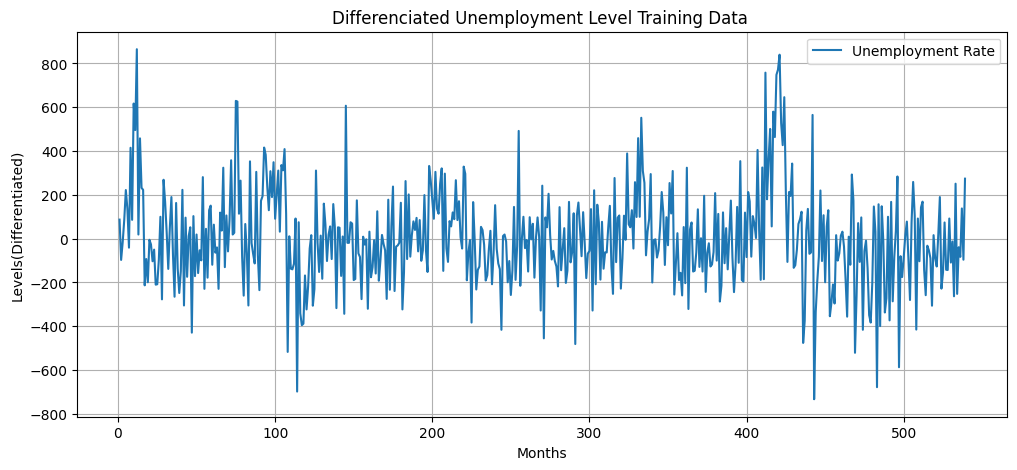

In [ ]:
# Plot the differenciated data
diff_y_Unemp_train = First_Order_Differencing(Rate_Unemp,value_column_name,\
                            'Differenciated Unemployment Level Training Data ')

ADF test result:
Test Statistic                  -5.168018
p-value                          0.000010
Number of Lags Used              5.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


(-0.2, 1.1)

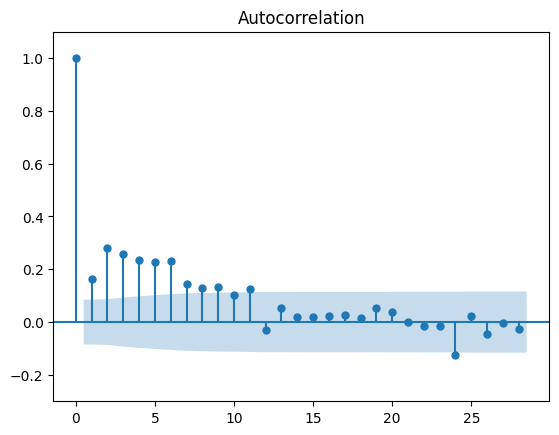

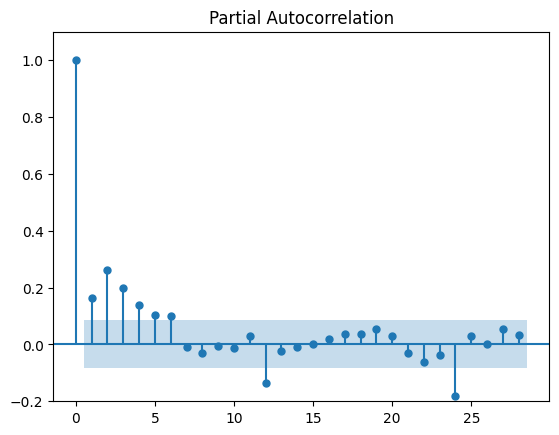

In [ ]:
# Check the ADF, autocorrelation, and partial autocorrelation for the differentiated data
adf_test(diff_y_Unemp_train)

plot_acf(diff_y_Unemp_train)
plt.ylim(-0.3,1.1)
plot_pacf(diff_y_Unemp_train) #pacf
plt.ylim(-0.2,1.1)

In [ ]:
# Find the potential correlation parameters
# q:ACF: 1,2,3,4,5,6,7,8,9,11,24
# p:PACF:1,2,3,4,5,6,12,24

In [ ]:
# print out the BIC matrix to find the best (p,q) parameters
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import arima model
from statsmodels.tsa.arima.model import ARIMA

diff_y_Unemp_train = diff_y_Unemp_train.astype(float)
#find p,q
pmax = 6  #less then length/10
qmax = 6  #less then length/10
bic_matrix = [] #bic metrix
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
      try: #use try to skip errors
        tmp.append(ARIMA(diff_y_Unemp_train.values, order = (p,1,q)).fit().bic)
      except:
        tmp.append(None)
    bic_matrix.append(tmp)

#print BIC matrix
bic_matrix = pd.DataFrame(bic_matrix) #find the min value
print(bic_matrix)
warnings.resetwarnings()

             0            1            2            3            4  \
0  7634.084431  7304.423878  7300.462765  7306.697365  7312.920515   
1  7429.188471  7300.524471  7306.690920  7313.012658  7319.242155   
2  7362.688254  7306.663328  7312.977827  7319.294861  7301.061677   
3  7337.743871  7312.950544  7319.254451  7310.924332  7305.220006   
4  7327.195955  7309.216846  7307.417197  7314.013480  7326.926695   
5  7320.682815  7325.714899  7313.900106  7322.521860  7307.317821   
6  7326.203848  7310.404968  7315.921427  7325.243379  7314.553830   

             5            6  
0  7318.918172  7323.059521  
1  7318.968940  7309.576549  
2  7323.051684  7328.919193  
3  7311.575539  7331.396133  
4  7315.404982  7323.750558  
5  7340.263413  7330.235945  
6  7332.366108  7342.052750  


In [ ]:
# Train the arima model by using the best parameters in the last cell
# row is p,column is q
from statsmodels.tsa.arima.model import ARIMA
p = 0
q = 2
d = 1
print(ARIMA(diff_y_Unemp_train.values, order = (p,d,q)).fit().bic)

7300.462765386905


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


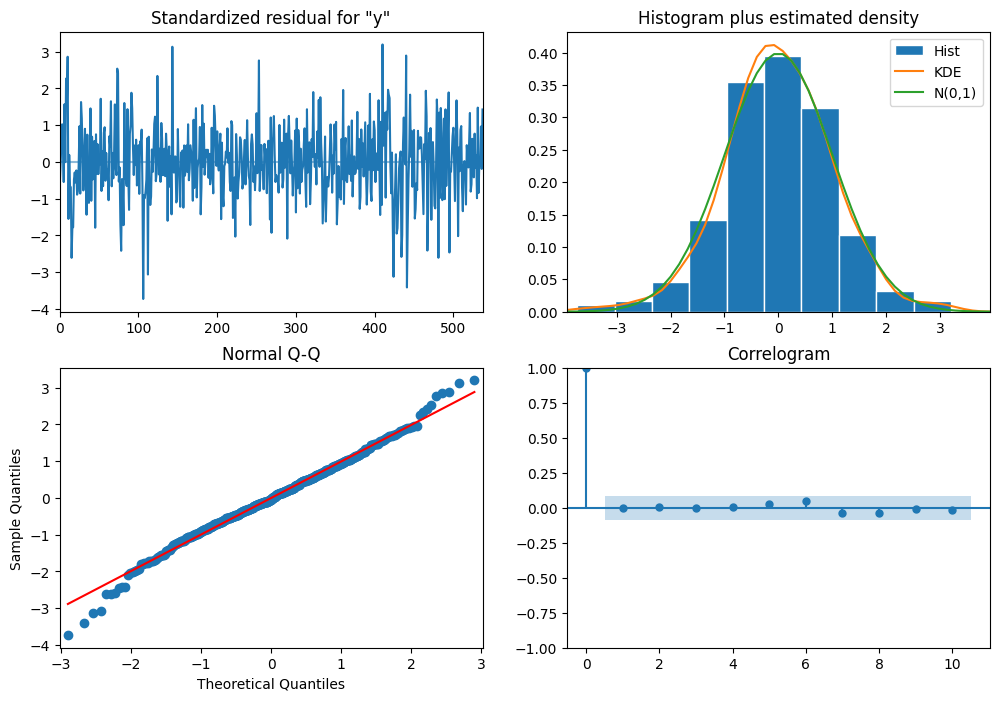

In [ ]:
# Plot the result for the residuals.
warnings.filterwarnings("ignore")
model = ARIMA(diff_y_Unemp_train.values, order=(p, d, q))
results = model.fit()
results.plot_diagnostics(figsize=(12, 8))
plt.show()

P-value for Ljung-Box Test:
1    0.946438
2    0.990409
3    0.999291
4    0.999885
5    0.996276
6    0.954236
Name: lb_pvalue, dtype: float64


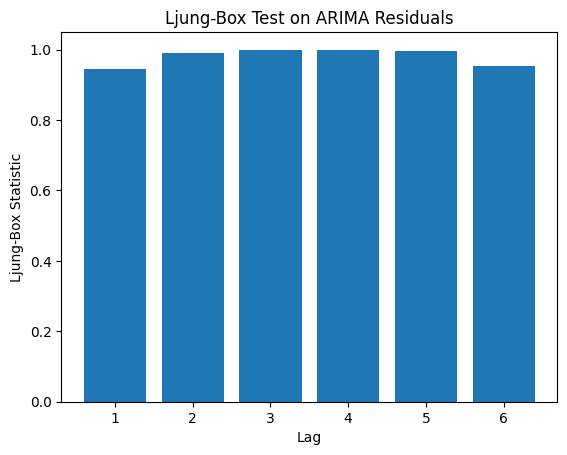

In [ ]:
# Use the Ljung-Box test to check the residuals
import statsmodels.api as sm

# get residuals
residuals = results.resid
#print(residuals)

# conduct Ljung-Box test
LB_df = sm.stats.acorr_ljungbox(residuals, lags=6, return_df=True)
# print out the p-values
p_value = LB_df['lb_pvalue']
# print Ljung-Box test result
plt.bar(range(1, len(LB_df['lb_pvalue']) + 1), LB_df['lb_pvalue'])
plt.xlabel('Lag')
plt.ylabel('Ljung-Box Statistic')
plt.title('Ljung-Box Test on ARIMA Residuals')

print(f"P-value for Ljung-Box Test:\n{p_value}")

In [ ]:
# Implement our fitted model to forecast the unemployment level between 2020-2024
test = y.diff()[-60:]
forecast_steps = len(test)  # how many steps we want to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# get confidence interval
confidence_interval = forecast.conf_int()

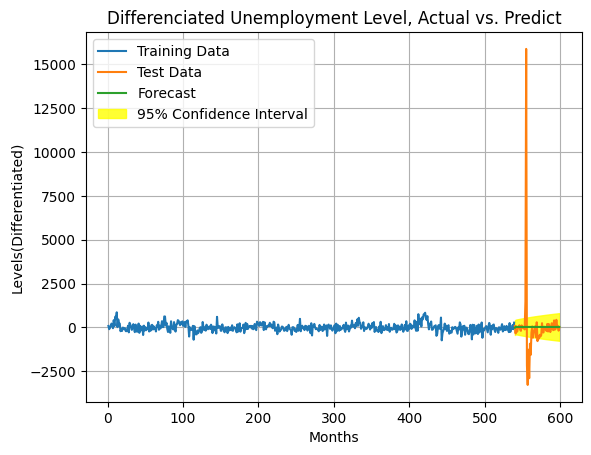

In [ ]:
# plot the final prediction
plt.plot(diff_y_Unemp_train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index,forecast_values, label='Forecast')


# plot confidence interval
plt.fill_between(test.index, confidence_interval[:, 0], confidence_interval[:, 1], color='yellow', alpha=0.8, label='95% Confidence Interval')

plt.title("Differenciated Unemployment Level, Actual vs. Predict")
plt.xlabel('Months')
plt.ylabel('Levels(Differentiated)')
plt.grid(True)
plt.legend()
#plt.xlim(504,564)
#plt.ylim(-500,500)
plt.show()

In [ ]:
# cross validation for the final predicton.
from sklearn.metrics import mean_squared_error, mean_absolute_error



# calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")

# calculate the Average Forecasting Error (AFE)
forecast_errors = test - forecast_values

# calculate different percentage
percentiles = [10, 25, 50, 75, 90]  # different percentage
percentile_values = np.percentile(forecast_errors, percentiles)

# print AFE
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th Percentile AFE: {value}")


Root Mean Squared Error (RMSE): 2187.591101690848
Mean Absolute Error (MAE): 683.7228488532103
10th Percentile AFE: -821.9133937193822
25th Percentile AFE: -339.11339371938215
50th Percentile AFE: -134.61339371938215
75th Percentile AFE: 30.63660628061784
90th Percentile AFE: 212.98660628061785
